In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
np.random.seed(100)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [172]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [173]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [174]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [175]:
data.shape

(20640, 10)

In [176]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [177]:
data = data[data['ocean_proximity']!='ISLAND']

In [178]:
round(data.isna().sum()/data.shape[0]*100,2)

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        1.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [179]:
median_value = data["total_bedrooms"].median()
data["total_bedrooms"].fillna(median_value, inplace=True)

In [180]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,536.867071,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,419.432146,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,297.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,644.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


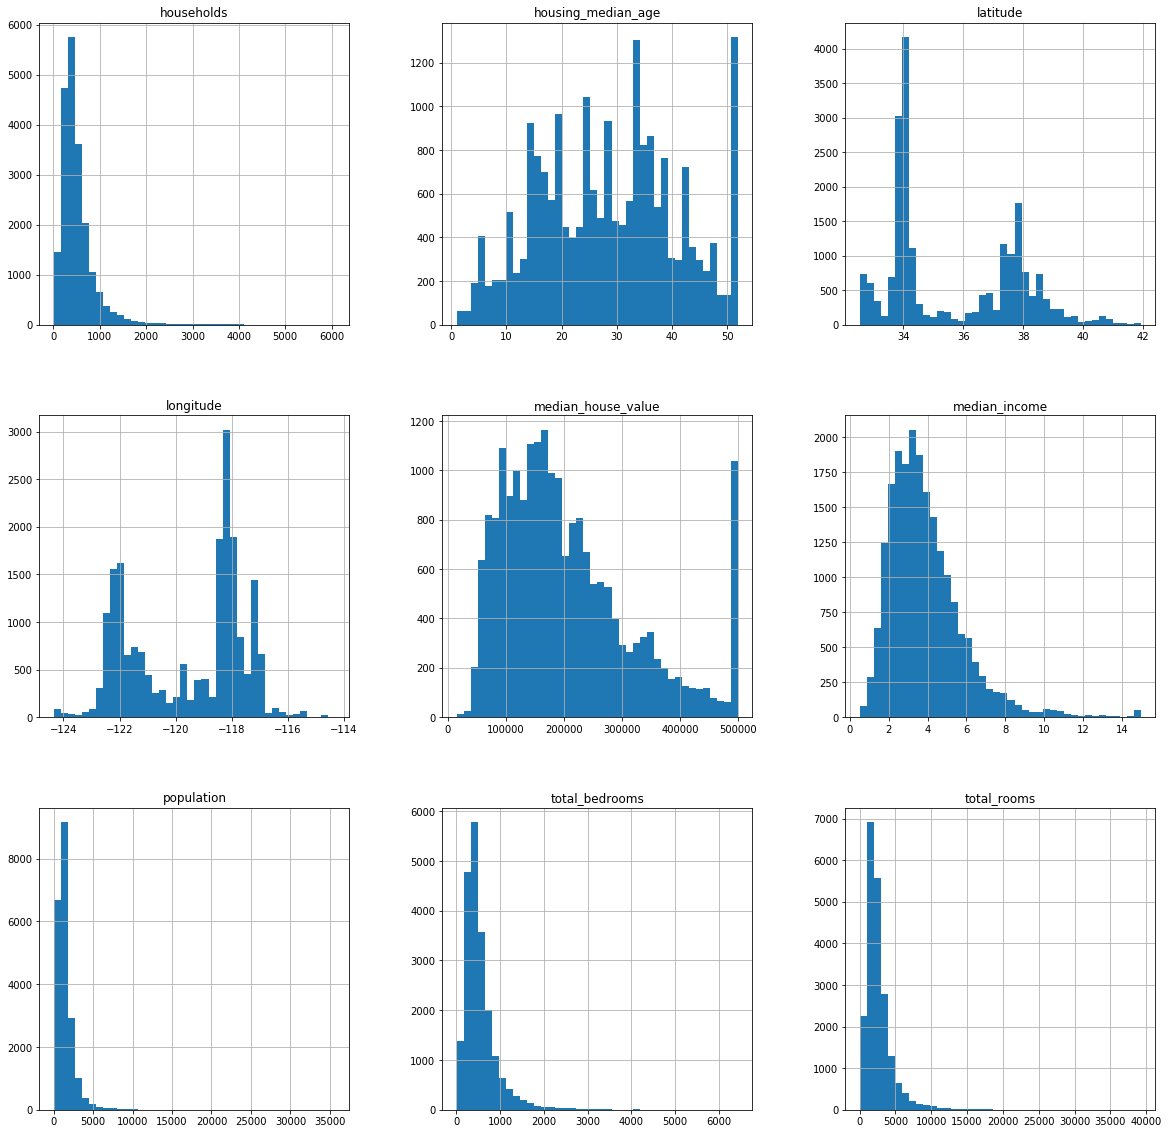

In [181]:
data.hist(bins=40, figsize=(20,20))
plt.show()

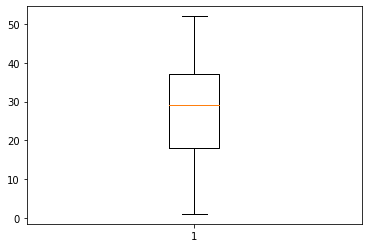

In [182]:
plt.boxplot(data['housing_median_age'])
plt.show()

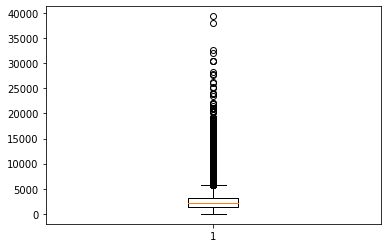

In [183]:
plt.boxplot(data['total_rooms'])
plt.show()

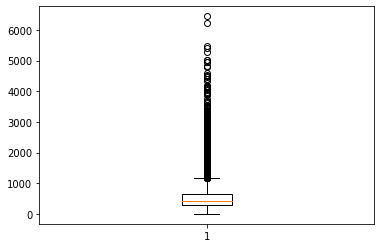

In [184]:
plt.boxplot(data['total_bedrooms'])
plt.show()

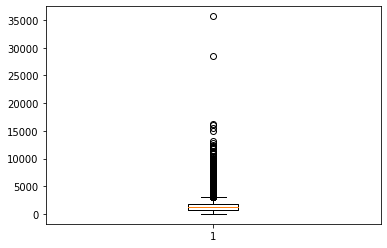

In [185]:
plt.boxplot(data['population'])
plt.show()

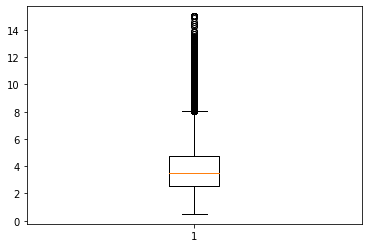

In [186]:
plt.boxplot(data['median_income'])
plt.show()

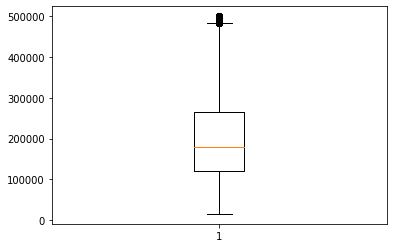

In [187]:
plt.boxplot(data['median_house_value'])
plt.show()

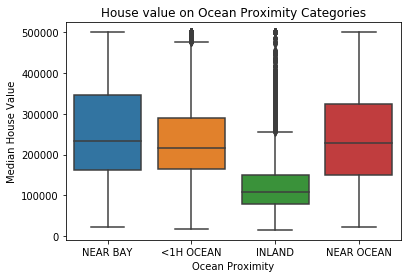

In [188]:
sns.boxplot(data=data, x="ocean_proximity", y="median_house_value")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.title("House value on Ocean Proximity Categories")
plt.show()

In [189]:
def OceanProximityClean(x):
    if x in ['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN']:
        return ('Outland')
    else:
        return ('inland')
    

In [190]:
data['ocean_proximity'] = list(map(OceanProximityClean,data['ocean_proximity'] ))

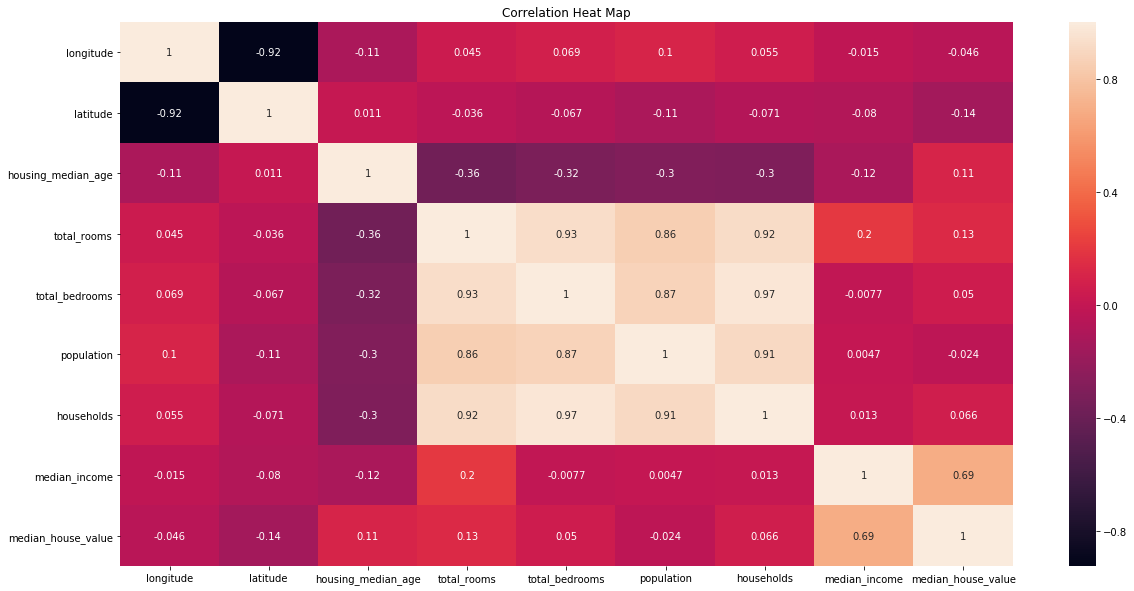

In [191]:
correlation = data.corr()
plt.figure(figsize=(20,10))
plt.title('Correlation Heat Map')
sns.heatmap(correlation,vmax=1,annot=True)

In [192]:
data = data.drop(['total_bedrooms', 'population'], axis=1)

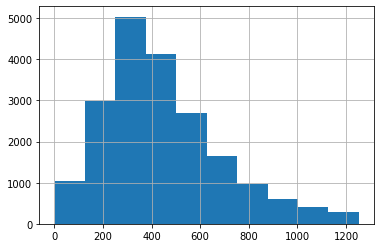

In [193]:
q1 = np.percentile(data['households'], 25)
q3 = np.percentile(data['households'], 75)
iqr = q3 - q1
upper_fence = q3 + 2 * iqr
data = data[(data['households'] < upper_fence)]
data['households'].hist()
plt.show()

In [194]:
q1 = np.percentile(data['median_income'], 25)
q3 = np.percentile(data['median_income'], 75)
iqr = q3 - q1
upper_fence = q3 + 2 * iqr
data = data[(data['median_income'] < upper_fence)]

In [195]:
q1 = np.percentile(data['total_rooms'], 25)
q3 = np.percentile(data['total_rooms'], 75)
iqr = q3 - q1
upper_fence = q3 + 2 * iqr
data = data[(data['total_rooms'] < upper_fence)]

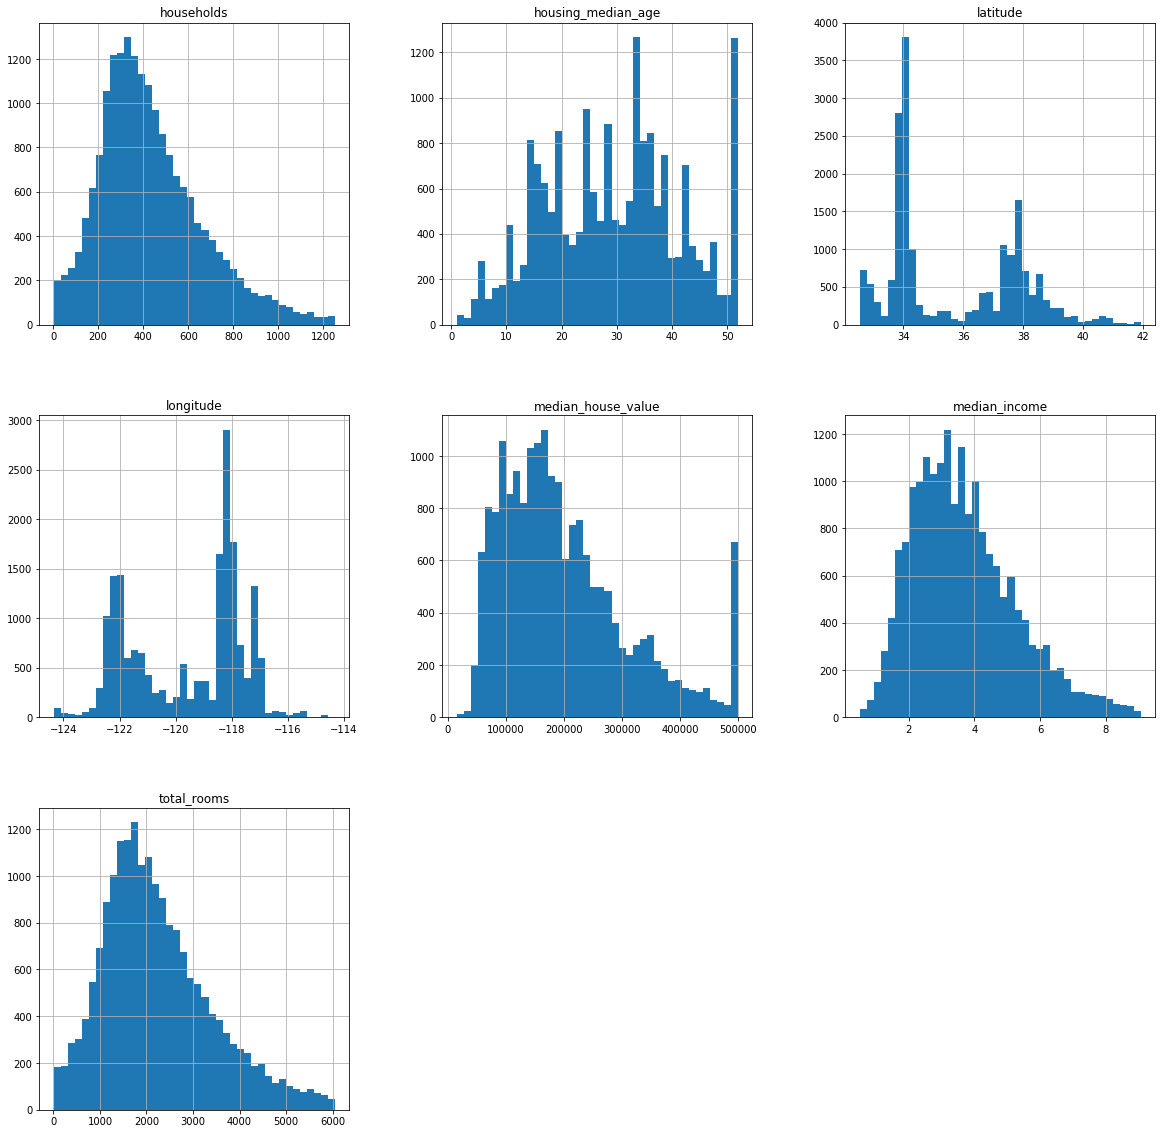

In [196]:
data.hist(bins=40, figsize=(20,20))
plt.show()

In [197]:
test = pd.cut(data['median_house_value'], 10) 
test.value_counts()

(111999.4, 160499.6]    3839
(160499.6, 208999.8]    3530
(63499.2, 111999.4]     3505
(208999.8, 257500.0]    2612
(257500.0, 306000.2]    1602
(306000.2, 354500.4]    1129
(14513.998, 63499.2]     868
(451500.8, 500001.0]     840
(354500.4, 403000.6]     681
(403000.6, 451500.8]     425
Name: median_house_value, dtype: int64

In [198]:
data['median_house_value'].describe()

count     19031.000000
mean     199825.327098
std      109760.171464
min       14999.000000
25%      116300.000000
50%      175000.000000
75%      255200.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [199]:
data = data[data['median_house_value']<=451500.8]

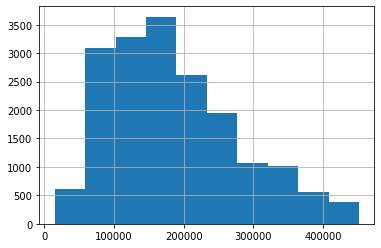

In [200]:
data['median_house_value'].hist()

Text(0.5, 0, 'latitude')

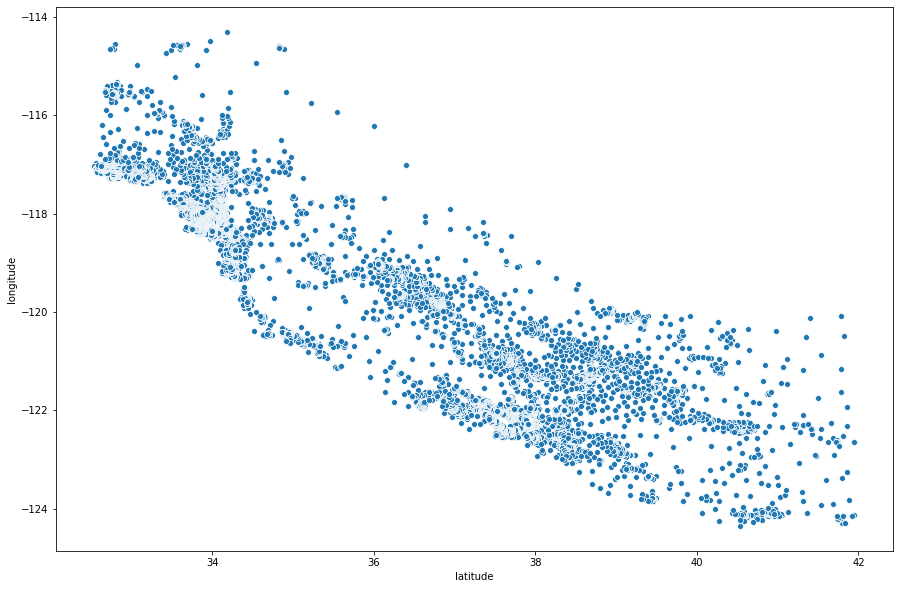

In [201]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data.latitude,y=data.longitude)
plt.ylabel("longitude")
plt.xlabel("latitude")

Text(0.5, 0, 'latitude')

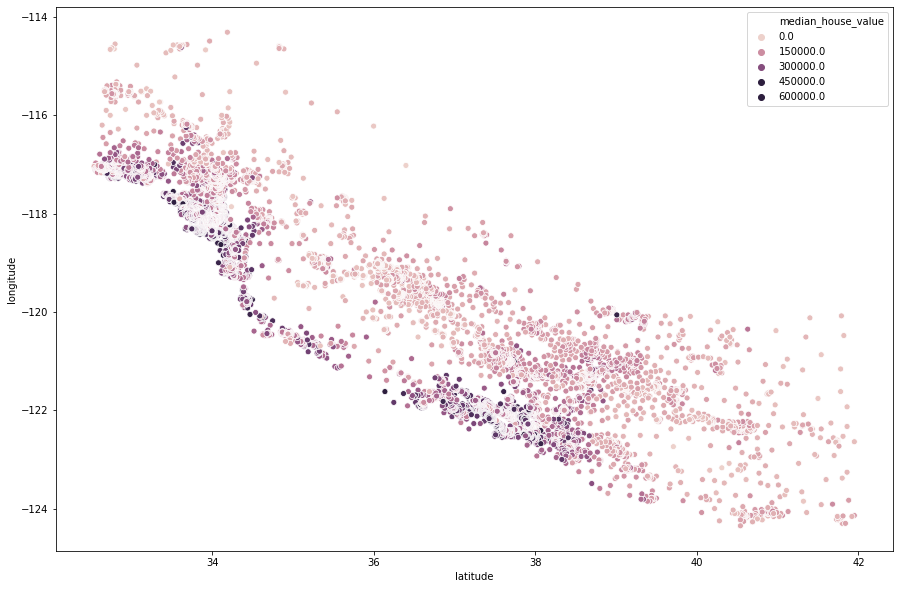

In [202]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data.latitude,y=data.longitude, hue=data.median_house_value)
plt.ylabel("longitude")
plt.xlabel("latitude")

In [208]:
data = data.reset_index()
data = data.drop(['index'], axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,households,median_income,median_house_value,ocean_proximity
0,-122.24,37.85,52.0,1467.0,177.0,7.2574,352100.0,Outland
1,-122.25,37.85,52.0,1274.0,219.0,5.6431,341300.0,Outland
2,-122.25,37.85,52.0,1627.0,259.0,3.8462,342200.0,Outland
3,-122.25,37.85,52.0,919.0,193.0,4.0368,269700.0,Outland
4,-122.25,37.84,52.0,2535.0,514.0,3.6591,299200.0,Outland


In [210]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(pd.DataFrame(data['ocean_proximity'])).toarray()
encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [211]:
data['ocean_proximity'].head()

0    Outland
1    Outland
2    Outland
3    Outland
4    Outland
Name: ocean_proximity, dtype: object

In [213]:
encoded_df = pd.DataFrame(encoded)

In [214]:
data = pd.concat([data,encoded_df], axis=1)
data = data.drop(['ocean_proximity'], axis = 1)

In [215]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,households,median_income,median_house_value,0,1
0,-122.24,37.85,52.0,1467.0,177.0,7.2574,352100.0,1.0,0.0
1,-122.25,37.85,52.0,1274.0,219.0,5.6431,341300.0,1.0,0.0
2,-122.25,37.85,52.0,1627.0,259.0,3.8462,342200.0,1.0,0.0
3,-122.25,37.85,52.0,919.0,193.0,4.0368,269700.0,1.0,0.0
4,-122.25,37.84,52.0,2535.0,514.0,3.6591,299200.0,1.0,0.0


In [216]:
df = data.copy()

In [231]:
data = df.copy()

In [232]:
x = data.drop([0,1,'median_house_value'], axis=1)
transformer = Normalizer().fit(x)
x_normalized = transformer.transform(x)

In [238]:
x = pd.concat([pd.DataFrame(x_normalized), data[[0,1]]], axis=1)
Y = data['median_house_value']

In [239]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, train_size=0.8)

In [240]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

0.40898882579447526
